In [1]:
import numpy as np
from PIL import ImageFont
from generate_ascii_palette import *
from matplotlib import pyplot as plt
from statistics import mean

In [2]:
FONT = ImageFont.truetype("fonts/CascadiaMono.ttf", 16)
WINDOW_SIZE = (1,2)

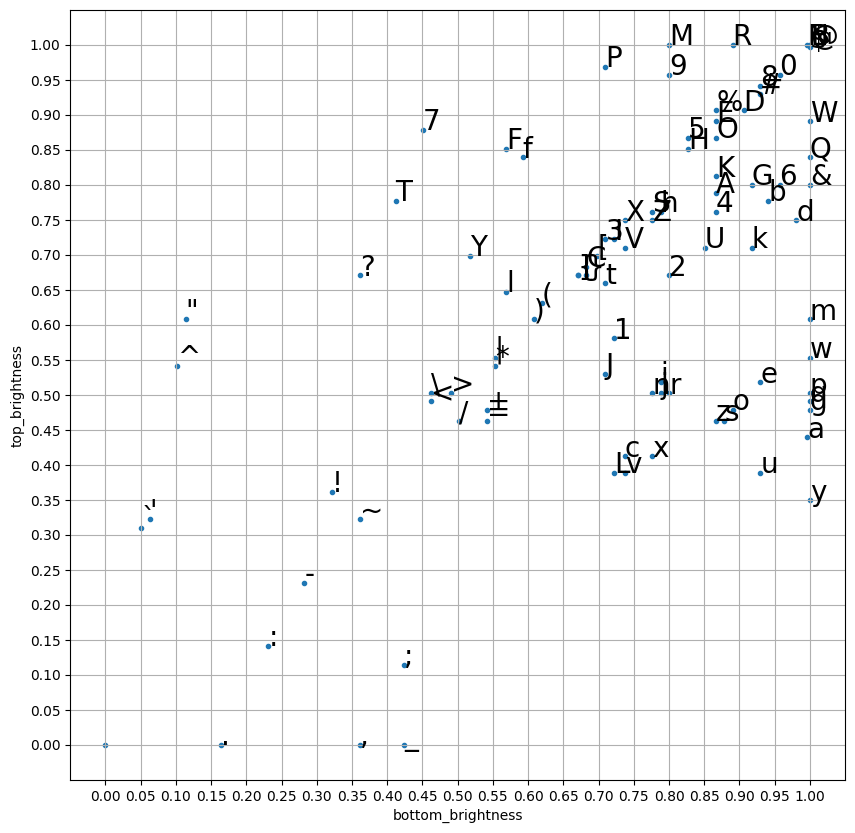

In [3]:
asciis = get_asciis()

brightness_map = find_brightness_map(asciis, FONT, WINDOW_SIZE, normalize=True)
brightness = list(brightness_map.values())
top_brightness = [b[0][0] for b in brightness]
bottom_brightness = [b[1][0] for b in brightness]
plt.figure(figsize=(10, 10))
plt.scatter(bottom_brightness, top_brightness, marker='.')
plt.xticks(np.arange(min(bottom_brightness), max(bottom_brightness) + 0.05, 0.05))
plt.yticks(np.arange(min(top_brightness), max(top_brightness) + 0.05, 0.05))
plt.xlabel("bottom_brightness")
plt.ylabel("top_brightness")
for i in range(len(asciis)):
    plt.annotate(asciis[i], (bottom_brightness[i], top_brightness[i]), size=20)
plt.grid()

In [4]:
char_to_brightness = {c: (b, np.mean(b)) for c, b in zip(asciis, brightness) }

In [5]:
x_bins = 9
y_bins = 9

char_bins = [[[] for _ in range(x_bins)] for _ in range(y_bins)]

br_max = max_brightness_per_pos(brightness)
br_y_step = br_max[0][0] / (y_bins-1)
br_x_step = br_max[1][0] / (x_bins-1)
for char, char_br in zip(asciis, brightness):
    bin_y_index = int(round(char_br[0][0] / br_y_step))
    bin_x_index = int(round(char_br[1][0] / br_x_step))
    char_bins[bin_y_index][bin_x_index].append(char)

for row in char_bins:
    print(row)

[[' '], ['.'], [], [',', '_'], [], [], [], [], []]
[[], [], [':'], [';'], [], [], [], [], []]
[['`'], [], ['-'], [], [], [], [], [], []]
[[], ["'"], [], ['!', '~'], [], [], ['c', 'v', 'x', 'L'], ['u'], ['y']]
[[], ['^'], [], [], ['*', '+', '/', '<', '=', '>', '\\', '|'], [], ['i', 'j', 'n', 'r', 'J'], ['e', 'o', 's', 'z'], ['a', 'g', 'p', 'q', 'w']]
[[], ['"'], [], ['?'], [], ['l', 'C', '(', ')', ']', '{', '}'], ['1', '2', 't'], [], ['m']]
[[], [], [], ['T'], ['Y'], [], ['3', 'h', 'I', 'S', 'V', 'X', 'Z', '['], ['4', 'k', 'A', 'G', 'K', 'U'], ['6', 'b', 'd', '&']]
[[], [], [], [], ['7'], ['f', 'F'], [], ['5', 'D', 'E', 'H', 'O', '#', '%'], ['Q', 'W']]
[[], [], [], [], [], [], ['9', 'M', 'P'], ['8', 'R'], ['0', 'B', 'N', '$', '@']]


In [6]:
def splice_cell(top, left):
    if len(top) > 0:
        res = top[0]
    else:
        res = left[0]
    for a in top:
        if (char_to_brightness[res][1] < char_to_brightness[a][1]):
            res = a

    for a in left:
        if (char_to_brightness[res][1] < char_to_brightness[a][1]):
            res = a
    return res


for y in range(y_bins):
    for x in range(x_bins):
        if len(char_bins[y][x]) == 0:
            if x > 0 and y > 0:
                char_bins[y][x].append(splice_cell(char_bins[y-1][x], char_bins[y][x-1]))
            elif x > 0:
                char_bins[y][x].append(splice_cell([], char_bins[y][x-1]))
            elif y > 0:
                char_bins[y][x].append(splice_cell(char_bins[y-1][x], []))

In [7]:
for row in char_bins:
    print(row)

[[' '], ['.'], ['.'], [',', '_'], ['_'], ['_'], ['_'], ['_'], ['_']]
[[' '], ['.'], [':'], [';'], [';'], [';'], [';'], [';'], [';']]
[['`'], ['`'], ['-'], [';'], [';'], [';'], [';'], [';'], [';']]
[['`'], ["'"], ['-'], ['!', '~'], ['!'], ['!'], ['c', 'v', 'x', 'L'], ['u'], ['y']]
[['`'], ['^'], ['^'], ['!'], ['*', '+', '/', '<', '=', '>', '\\', '|'], ['|'], ['i', 'j', 'n', 'r', 'J'], ['e', 'o', 's', 'z'], ['a', 'g', 'p', 'q', 'w']]
[['`'], ['"'], ['"'], ['?'], ['|'], ['l', 'C', '(', ')', ']', '{', '}'], ['1', '2', 't'], ['2'], ['m']]
[['`'], ['"'], ['"'], ['T'], ['Y'], ['C'], ['3', 'h', 'I', 'S', 'V', 'X', 'Z', '['], ['4', 'k', 'A', 'G', 'K', 'U'], ['6', 'b', 'd', '&']]
[['`'], ['"'], ['"'], ['T'], ['7'], ['f', 'F'], ['h'], ['5', 'D', 'E', 'H', 'O', '#', '%'], ['Q', 'W']]
[['`'], ['"'], ['"'], ['T'], ['7'], ['f'], ['9', 'M', 'P'], ['8', 'R'], ['0', 'B', 'N', '$', '@']]


In [8]:
palette = []
for row in char_bins:
    palette.append([])
    for col in row:
        c = col[len(col)//2]
        palette[-1].append(c)
    print(palette[-1])

[' ', '.', '.', '_', '_', '_', '_', '_', '_']
[' ', '.', ':', ';', ';', ';', ';', ';', ';']
['`', '`', '-', ';', ';', ';', ';', ';', ';']
['`', "'", '-', '~', '!', '!', 'x', 'u', 'y']
['`', '^', '^', '!', '=', '|', 'n', 's', 'p']
['`', '"', '"', '?', '|', ')', '2', '2', 'm']
['`', '"', '"', 'T', 'Y', 'C', 'V', 'G', 'd']
['`', '"', '"', 'T', '7', 'F', 'h', 'H', 'W']
['`', '"', '"', 'T', '7', 'f', 'M', 'R', 'N']


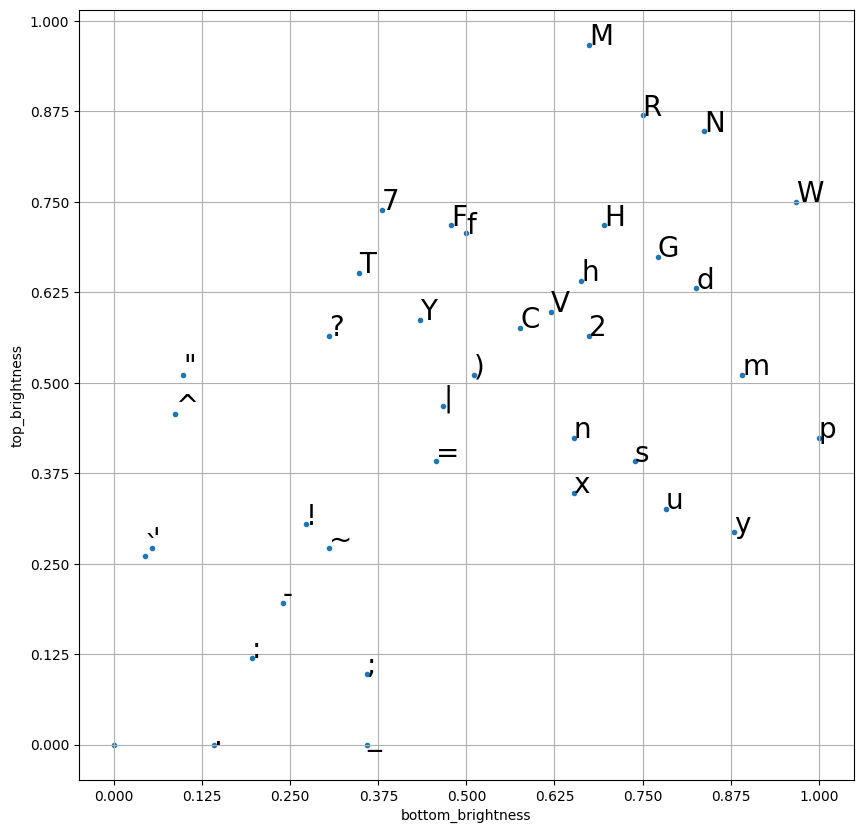

In [9]:
palette_chars = np.unique(palette)

brightness_map = generate_brightness_map(palette_chars, FONT, WINDOW_SIZE, normalize=True)
brightness = brightness_map.values()
top_brightness = [b[0][0] for b in brightness]
bottom_brightness = [b[1][0] for b in brightness]
plt.figure(figsize=(10, 10))
plt.scatter(bottom_brightness, top_brightness, marker='.')
plt.xticks(np.arange(min(bottom_brightness), max(bottom_brightness) + br_x_step, br_x_step))
plt.yticks(np.arange(min(top_brightness), max(top_brightness) + br_y_step, br_y_step))
plt.xlabel("bottom_brightness")
plt.ylabel("top_brightness")
for i in range(len(palette_chars)):
    plt.annotate(palette_chars[i], (bottom_brightness[i], top_brightness[i]), size=20)
plt.grid()

In [10]:
char_bins, bins_br = generate_1_2_palette(get_asciis(), FONT, (9,9))

for row in char_bins:
    print(row)
    
for row in bins_br:
    print(row)

[[' '], ['.'], [','], ['_'], ['_'], ['_'], ['_'], ['_'], ['_']]
[[' '], [':'], [':'], [';'], [';'], [';'], [';'], [';'], [';']]
[["'", '`'], ["'"], ['-', '~'], ['~'], ['~'], ['~'], ['y'], ['y'], ['y']]
[["'"], ["'"], ['!'], ['+', '/', '<', '='], ['c', 'v', 'L'], ['o', 's', 'x', 'z'], ['a', 'u'], ['q'], ['g']]
[["'"], ['"', '^'], ['"'], ['l', '*', '>', '\\', '|'], ['1', 'J', '(', ')'], ['i', 'j', 'n', 'r'], ['e', 'm', 'w'], ['p'], ['g']]
[["'"], ['"'], ['T', '?'], ['Y'], ['3', 't', 'C', 'I', 'V', 'X', '[', ']', '{', '}'], ['2', '4', 'h', 'A', 'S', 'U', 'Z'], ['b', 'd', 'k'], ['d'], ['g']]
[["'"], ['"'], ['T'], ['7', 'F'], ['f'], ['5', 'D', 'E', 'H', 'K', 'O', '%'], ['6', 'G', '#'], ['Q', 'W', '&'], ['W']]
[["'"], ['"'], ['T'], ['F'], ['P'], ['9', 'R'], ['0', '8', 'B', 'N', '$'], ['B'], ['@']]
[["'"], ['"'], ['T'], ['F'], ['P'], ['M'], ['B'], ['B'], ['@']]
[array([[0.],
       [0.]]), array([[0.        ],
       [0.05098039]]), array([[0.        ],
       [0.10980392]]), array([[0.      